In [3]:
import numpy as np
import pandas as pd

In [4]:
crop = pd.read_csv("Crop_rotation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.isnull().sum()
crop.duplicated().sum()

0

In [6]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,50.527513,53.378809,48.157344,25.617159,71.486820,6.469339,103.446614
std,36.908120,32.984758,50.657971,5.064718,22.267620,0.774085,54.965075
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.768393,60.255364,5.971573,64.544549
50%,37.000000,51.000000,32.000000,25.600337,80.474764,6.424671,94.781896
75%,84.000000,68.000000,49.000000,28.561810,89.960531,6.923776,124.222072
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee          99
Name: count, dtype: int64

In [8]:
# Encoding
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [9]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee,22
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22


In [10]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [11]:
# Train, test and split
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [12]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2194,97,35,26,24.914610,53.741447,6.334610,166.254931
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839


In [13]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2194    22
2195    22
2196    22
2197    22
2198    22
Name: crop_num, Length: 2199, dtype: int64

In [14]:
y.shape

(2199,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train


,N,P,K,temperature,humidity,ph,rainfall
891,0,67,22,29.821121,69.407321,6.593798,51.564611
874,21,63,17,25.089661,68.175431,6.559682,41.454866
1178,28,27,34,32.454653,50.696938,6.526654,95.048716
162,67,51,24,23.502979,61.320261,5.584171,64.777914
2124,108,33,31,23.692871,66.760901,7.393826,144.657642
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [18]:
# Scaling features using minmax scaler
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [19]:
X_train


array([[0.        , 0.44285714, 0.085     , ..., 0.64336938, 0.48038624,
        0.11264046],
       [0.15      , 0.41428571, 0.06      , ..., 0.62899423, 0.47508068,
        0.07632005],
       [0.2       , 0.15714286, 0.145     , ..., 0.42503444, 0.46994448,
        0.26886207],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43766892, 0.46198144,
        0.28757906],
       [0.07857143, 0.85      , 0.995     , ..., 0.76775145, 0.44420505,
        0.18390291],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56108125, 0.54465022,
        0.11926686]])

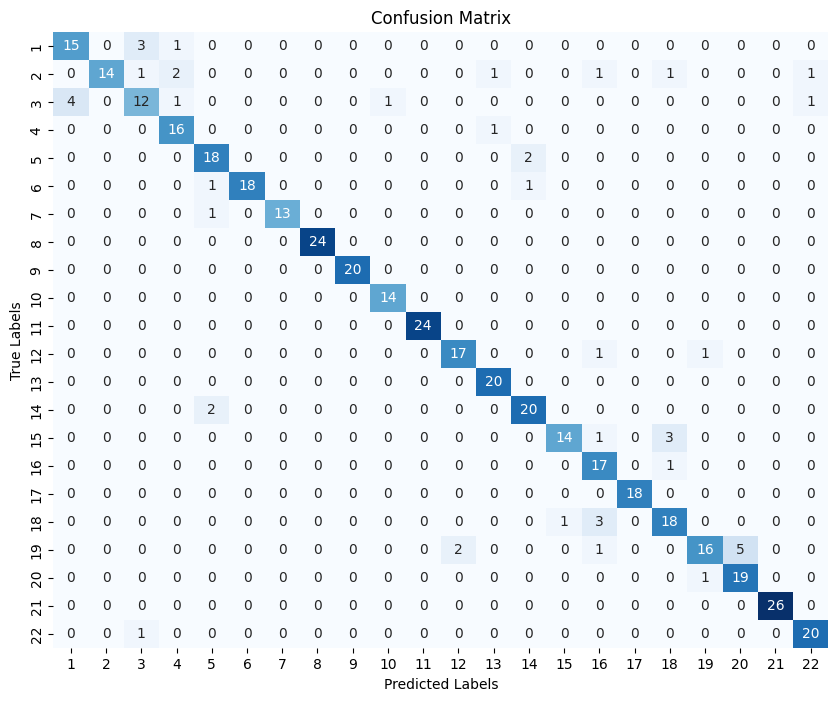

In [21]:
# Training models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(), 
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'ypred' are your true and predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Create a figure and an axes
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(list(set(y_test))),
            yticklabels=sorted(list(set(y_test))))

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [22]:
# finally selected randomforest model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [23]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [24]:
# Predictive system
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    prediction = rfc.predict(transformed_features)
    print(prediction)
    return prediction[0] 

In [25]:
# new inputs


N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[7]
Orange is a best crop to be cultivated 
